In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

## LOAD DATASET

In [15]:
df=pd.read_csv("chronickidneydisease.csv")
pd.set_option("display.max_column",None)
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [38]:
df.shape

(400, 27)

In [39]:
df.info

<bound method DataFrame.info of       id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba    bgr    bu   sc    sod  pot  hemo pcv    wc   rc  htn   dm  \
0    notpresent  121.0  36.0  1.2  

In [40]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,ane,apppet
count,400.000000,400.000000,400.000000,353.000000,400.00000,351.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.562500,76.575000,1.017408,0.90000,0.450142,149.382500,56.693000,2.997125,137.623750,4.687500,12.522500,0.150000,0.205000
std,115.614301,16.982996,13.489785,0.005717,1.31313,1.099191,80.935701,49.395258,5.628886,9.637883,3.546701,2.906435,0.357519,0.404207
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.010000,0.00000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,0.000000,0.000000
50%,199.500000,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.700000,0.000000,0.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,165.000000,61.750000,2.725000,142.000000,4.900000,15.000000,0.000000,0.000000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,1.000000,1.000000


In [42]:
df.sod.unique()

array([139. , 136. , 140. , 111. , 142. , 104. , 147. , 131. , 114. ,
       124. , 138. , 135. , 130. , 141. , 145. ,   4.5, 128. , 129. ,
       144. , 132. , 133. , 150. , 134. , 125. , 137. , 163. , 143. ,
       127. , 146. , 126. , 122. , 115. , 113. , 120. ])

In [43]:
df.pcc.value_counts()

notpresent    354
present        42
Name: pcc, dtype: int64

In [18]:
print(numerical_feature)

['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']


In [104]:
df.isnull().any()

id                False
age               False
bp                False
sg                 True
al                False
su                 True
rbc                True
pc                 True
pcc                True
ba                 True
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv                True
wc                 True
rc                 True
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane               False
classification    False
apppet            False
dtype: bool

In [23]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,139.0,3.8,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,410.0,18.0,0.8,136.0,4.9,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,140.0,4.8,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,136.0,4.0,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [33]:
discrete_feature

['bp', 'sg', 'al', 'su']

## VISUALIZATION

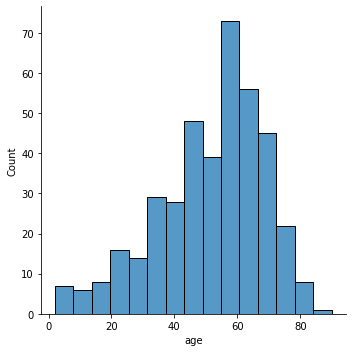

In [44]:
sns.displot(df.age)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bu', ylabel='appet'>

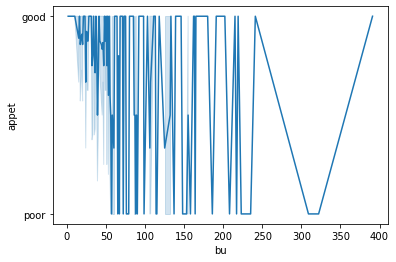

In [45]:
sns.lineplot(df.bu,df.appet)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sg', ylabel='bp'>

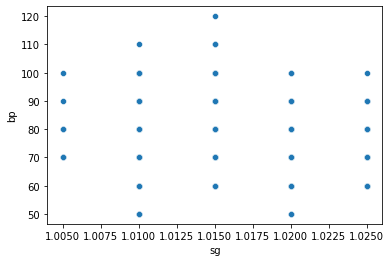

In [48]:
sns.scatterplot(df.sg,df.bp)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bp'}>,
        <AxesSubplot:title={'center':'sg'}>],
       [<AxesSubplot:title={'center':'al'}>,
        <AxesSubplot:title={'center':'su'}>,
        <AxesSubplot:title={'center':'bgr'}>,
        <AxesSubplot:title={'center':'bu'}>],
       [<AxesSubplot:title={'center':'sc'}>,
        <AxesSubplot:title={'center':'sod'}>,
        <AxesSubplot:title={'center':'pot'}>,
        <AxesSubplot:title={'center':'hemo'}>],
       [<AxesSubplot:title={'center':'ane'}>,
        <AxesSubplot:title={'center':'apppet'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

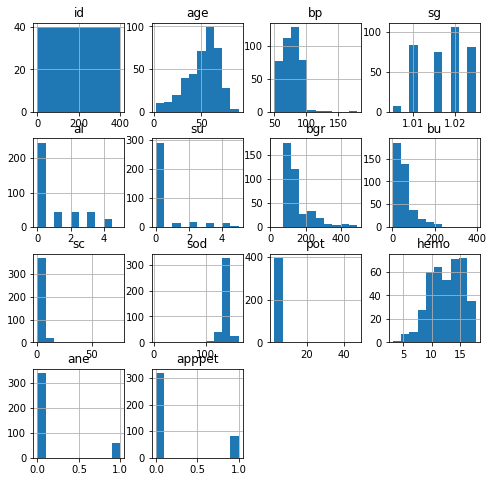

In [55]:
df.hist(figsize=(8,8))

## OUTLIER DETECTION

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pot'>

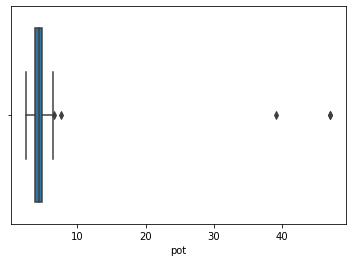

In [57]:
sns.boxplot(df.pot)

In [62]:
 # z-score, percentile, iqr

## OUTLIER REMOVAL USING IQR

In [58]:
q1=df.hemo.quantile(0.25)  #(Q1)
q3=df.hemo.quantile(0.75)  #(Q3)

In [65]:
IQR=q3-q1

In [66]:
upper_limit= q3 + 1.5*IQR

In [68]:
uppper_limit= q3 + 1.5*IQR
lower_limit=q1 - 1.5*IQR

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bu'>

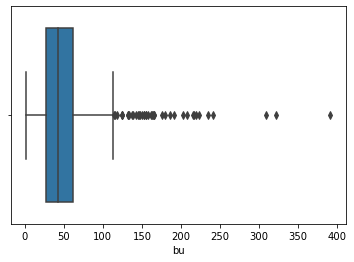

In [69]:
sns.boxplot(df.bu)

In [70]:
df.median()

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_10040\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


id        199.50
age        55.00
bp         80.00
sg          1.02
al          0.00
su          0.00
bgr       121.00
bu         42.00
sc          1.30
sod       138.00
pot         4.40
hemo       12.70
ane         0.00
apppet      0.00
dtype: float64

## OUTLIER REMOVAL WITH PERCENTILE

In [71]:
p99=df.hemo.quantile(0.99)
p99

17.601

## Z-SCORE

In [73]:
from scipy import stats

In [76]:
hemo_zscore=stats.zscore(df.hemo)

In [77]:
hemo_zscore

0      1.021537
1     -0.407646
2     -1.000235
3     -0.442505
4     -0.303072
         ...   
395    1.126111
396    1.404976
397    1.160969
398    0.603239
399    1.160969
Name: hemo, Length: 396, dtype: float64

## ENCODING TECHNIQUES

## 1. One hot encoding 

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
le=LabelEncoder()

In [80]:
df.age=le.fit_transform(df.age)
df.bp=le.fit_transform(df.bp)

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_10040\55109914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.age=le.fit_transform(df.age)
C:\Users\ELCOT\AppData\Local\Temp\ipykernel_10040\55109914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bp=le.fit_transform(df.bp)


In [81]:
df.head(

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification,apppet
0,0,40,3,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,139.0,3.8,15.4,44,7800,5.2,yes,yes,no,good,no,0,ckd,0
1,1,5,0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,410.0,18.0,0.8,136.0,4.9,11.3,38,6000,NaN,no,no,no,good,no,0,ckd,0
2,2,54,3,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,140.0,4.8,9.6,31,7500,NaN,no,yes,no,poor,no,1,ckd,1
3,3,40,2,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,1,ckd,1
4,4,43,3,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,136.0,4.0,11.6,35,7300,4.6,no,no,no,good,no,0,ckd,0


## 2. One hot encoding

In [83]:
df_main=pd.get_dummies(df,columns=['hemo'])
df_main.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification,apppet,hemo_3.1,hemo_4.8,hemo_5.5,hemo_5.6,hemo_5.8,hemo_6.0,hemo_6.1,hemo_6.2,hemo_6.3,hemo_6.6,hemo_6.8,hemo_7.1,hemo_7.3,hemo_7.5,hemo_7.6,hemo_7.7,hemo_7.9,hemo_8.0,hemo_8.1,hemo_8.2,hemo_8.3,hemo_8.4,hemo_8.5,hemo_8.6,hemo_8.7,hemo_8.8,hemo_9.0,hemo_9.1,hemo_9.2,hemo_9.3,hemo_9.4,hemo_9.5,hemo_9.6,hemo_9.7,hemo_9.8,hemo_9.9,hemo_10.0,hemo_10.1,hemo_10.2,hemo_10.3,hemo_10.4,hemo_10.5,hemo_10.6,hemo_10.7,hemo_10.8,hemo_10.9,hemo_11.0,hemo_11.1,hemo_11.2,hemo_11.3,hemo_11.4,hemo_11.5,hemo_11.6,hemo_11.7,hemo_11.8,hemo_11.9,hemo_12.0,hemo_12.1,hemo_12.2,hemo_12.3,hemo_12.4,hemo_12.5,hemo_12.6,hemo_12.7,hemo_12.8,hemo_12.9,hemo_13.0,hemo_13.1,hemo_13.2,hemo_13.3,hemo_13.4,hemo_13.5,hemo_13.6,hemo_13.7,hemo_13.8,hemo_13.9,hemo_14.0,hemo_14.1,hemo_14.2,hemo_14.3,hemo_14.4,hemo_14.5,hemo_14.6,hemo_14.7,hemo_14.8,hemo_14.9,hemo_15.0,hemo_15.1,hemo_15.2,hemo_15.3,hemo_15.4,hemo_15.5,hemo_15.6,hemo_15.7,hemo_15.8,hemo_15.9,hemo_16.0,hemo_16.1,hemo_16.2,hemo_16.3,hemo_16.4,hemo_16.5,hemo_16.6,hemo_16.7,hemo_16.8,hemo_16.9,hemo_17.0,hemo_17.1,hemo_17.2,hemo_17.3,hemo_17.4,hemo_17.5,hemo_17.6
0,0,40,3,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,139.0,3.8,44,7800,5.2,yes,yes,no,good,no,0,ckd,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,5,0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,410.0,18.0,0.8,136.0,4.9,38,6000,NaN,no,no,no,good,no,0,ckd,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,54,3,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,140.0,4.8,31,7500,NaN,no,yes,no,poor,no,1,ckd,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,40,2,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,32,6700,3.9,yes,no,no,poor,yes,1,ckd,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,43,3,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,136.0,4.0,35,7300,4.6,no,no,no,good,no,0,ckd,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
df.corr()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,ane,apppet
id,1.000000,-0.197067,-0.252391,0.638407,-0.465053,-0.280381,-0.286931,-0.296448,-0.260719,0.315743,-0.057179,0.560785,-0.270175,-0.371419
age,-0.197067,1.000000,0.137673,-0.206209,0.096944,0.224162,0.225527,0.194825,0.135035,-0.076681,-0.024358,-0.183094,0.051293,0.161584
bp,-0.252391,0.137673,1.000000,-0.219445,0.137394,0.201882,0.125990,0.194012,0.153031,-0.109391,0.042901,-0.261353,0.205435,0.166040
sg,0.638407,-0.206209,-0.219445,1.000000,-0.462410,-0.294044,-0.289331,-0.298407,-0.343909,0.364022,-0.032571,0.535819,-0.240727,-0.265831
al,-0.465053,0.096944,0.137394,-0.462410,1.000000,0.266896,0.283320,0.345711,0.159189,-0.225034,0.065151,-0.430235,0.227388,0.300732
su,-0.280381,0.224162,0.201882,-0.294044,0.266896,1.000000,0.624212,0.166259,0.222189,-0.092490,0.131964,-0.221140,0.073970,0.085825
bgr,-0.286931,0.225527,0.125990,-0.289331,0.283320,0.624212,1.000000,0.147465,0.116303,-0.172645,0.040764,-0.206721,0.139841,0.185707
bu,-0.296448,0.194825,0.194012,-0.298407,0.345711,0.166259,0.147465,1.000000,0.580933,-0.301366,0.258819,-0.511619,0.435382,0.272623
sc,-0.260719,0.135035,0.153031,-0.343909,0.159189,0.222189,0.116303,0.580933,1.000000,-0.586227,0.146806,-0.334616,0.235308,0.160521
sod,0.315743,-0.076681,-0.109391,0.364022,-0.225034,-0.092490,-0.172645,-0.301366,-0.586227,1.000000,0.087350,0.304201,-0.184486,-0.153829


<AxesSubplot:>

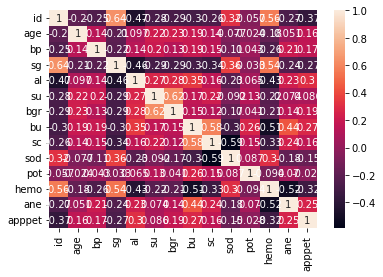

In [119]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

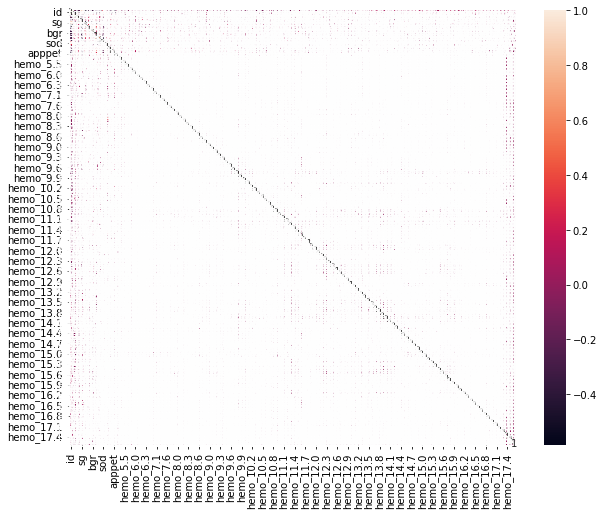

In [118]:
plt.figure(figsize=(10,8))
sns.heatmap(df_main.corr(),annot=True)

## X and Y Split

In [116]:
# dependent variable

y=df_main['pcc']
y

0      notpresent
1      notpresent
2      notpresent
3         present
4      notpresent
          ...    
395    notpresent
396    notpresent
397    notpresent
398    notpresent
399    notpresent
Name: pcc, Length: 396, dtype: object

In [92]:
# independent variable

x=df_main.drop(columns=['pcc'],axis=1)
x.head()

,id,age,bp,sg,al,su,rbc,pc,ba,bgr,bu,sc,sod,pot,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification,apppet,hemo_3.1,hemo_4.8,hemo_5.5,hemo_5.6,hemo_5.8,hemo_6.0,hemo_6.1,hemo_6.2,hemo_6.3,hemo_6.6,hemo_6.8,hemo_7.1,hemo_7.3,hemo_7.5,hemo_7.6,hemo_7.7,hemo_7.9,hemo_8.0,hemo_8.1,hemo_8.2,hemo_8.3,hemo_8.4,hemo_8.5,hemo_8.6,hemo_8.7,hemo_8.8,hemo_9.0,hemo_9.1,hemo_9.2,hemo_9.3,hemo_9.4,hemo_9.5,hemo_9.6,hemo_9.7,hemo_9.8,hemo_9.9,hemo_10.0,hemo_10.1,hemo_10.2,hemo_10.3,hemo_10.4,hemo_10.5,hemo_10.6,hemo_10.7,hemo_10.8,hemo_10.9,hemo_11.0,hemo_11.1,hemo_11.2,hemo_11.3,hemo_11.4,hemo_11.5,hemo_11.6,hemo_11.7,hemo_11.8,hemo_11.9,hemo_12.0,hemo_12.1,hemo_12.2,hemo_12.3,hemo_12.4,hemo_12.5,hemo_12.6,hemo_12.7,hemo_12.8,hemo_12.9,hemo_13.0,hemo_13.1,hemo_13.2,hemo_13.3,hemo_13.4,hemo_13.5,hemo_13.6,hemo_13.7,hemo_13.8,hemo_13.9,hemo_14.0,hemo_14.1,hemo_14.2,hemo_14.3,hemo_14.4,hemo_14.5,hemo_14.6,hemo_14.7,hemo_14.8,hemo_14.9,hemo_15.0,hemo_15.1,hemo_15.2,hemo_15.3,hemo_15.4,hemo_15.5,hemo_15.6,hemo_15.7,hemo_15.8,hemo_15.9,hemo_16.0,hemo_16.1,hemo_16.2,hemo_16.3,hemo_16.4,hemo_16.5,hemo_16.6,hemo_16.7,hemo_16.8,hemo_16.9,hemo_17.0,hemo_17.1,hemo_17.2,hemo_17.3,hemo_17.4,hemo_17.5,hemo_17.6
0,0,40,3,1.020,1.0,0.0,NaN,normal,notpresent,121.0,36.0,1.2,139.0,3.8,44,7800,5.2,yes,yes,no,good,no,0,ckd,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,5,0,1.020,4.0,0.0,NaN,normal,notpresent,410.0,18.0,0.8,136.0,4.9,38,6000,NaN,no,no,no,good,no,0,ckd,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,54,3,1.010,2.0,3.0,normal,normal,notpresent,423.0,53.0,1.8,140.0,4.8,31,7500,NaN,no,yes,no,poor,no,1,ckd,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,40,2,1.005,4.0,0.0,normal,abnormal,notpresent,117.0,56.0,3.8,111.0,2.5,32,6700,3.9,yes,no,no,poor,yes,1,ckd,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,43,3,1.010,2.0,0.0,normal,normal,notpresent,106.0,26.0,1.4,136.0,4.0,35,7300,4.6,no,no,no,good,no,0,ckd,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## LINEAR REGRESSION

## 1.Simple Linear Regression

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 9 (	) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


C:\Users\ELCOT\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


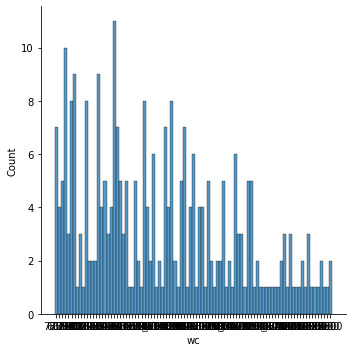

In [120]:
sns.displot(df.wc)

In [141]:
x=df.drop(columns=['hemo'],axis=1)
x

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification,apppet
0,0,40,3,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,139.0,3.8,44,7800,5.2,yes,yes,no,good,no,0,ckd,0
1,1,5,0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,410.0,18.0,0.8,136.0,4.9,38,6000,NaN,no,no,no,good,no,0,ckd,0
2,2,54,3,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,140.0,4.8,31,7500,NaN,no,yes,no,poor,no,1,ckd,1
3,3,40,2,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,32,6700,3.9,yes,no,no,poor,yes,1,ckd,1
4,4,43,3,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,136.0,4.0,35,7300,4.6,no,no,no,good,no,0,ckd,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,3,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,47,6700,4.9,no,no,no,good,no,0,notckd,0
396,396,34,2,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,54,7800,6.2,no,no,no,good,no,0,notckd,0
397,397,8,3,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,49,6600,5.4,no,no,no,good,no,0,notckd,0
398,398,11,1,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,51,7200,5.9,no,no,no,good,no,0,notckd,0


## 2. Multi Linear Regression

In [126]:
from sklearn.linear_model import LinearRegression

In [151]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [153]:
df.State=le.fit_transform(df.hemo)
df

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_10040\1392005329.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.State=le.fit_transform(df.hemo)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification,apppet
0,0,40,3,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,139.0,3.8,15.4,44,7800,5.2,yes,yes,no,good,no,0,ckd,0
1,1,5,0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,410.0,18.0,0.8,136.0,4.9,11.3,38,6000,NaN,no,no,no,good,no,0,ckd,0
2,2,54,3,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,140.0,4.8,9.6,31,7500,NaN,no,yes,no,poor,no,1,ckd,1
3,3,40,2,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,1,ckd,1
4,4,43,3,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,136.0,4.0,11.6,35,7300,4.6,no,no,no,good,no,0,ckd,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,3,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,0,notckd,0
396,396,34,2,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,0,notckd,0
397,397,8,3,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,0,notckd,0
398,398,11,1,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,0,notckd,0


In [155]:
df.corr().age.sort_values(ascending=False)

age       1.000000
bgr       0.225527
su        0.224162
bu        0.194825
apppet    0.161584
bp        0.137673
sc        0.135035
al        0.096944
ane       0.051293
pot      -0.024358
sod      -0.076681
hemo     -0.183094
id       -0.197067
sg       -0.206209
Name: age, dtype: float64

## X ana Y split

In [157]:
X=df.drop(columns=['age'],axis=1)
X.head()  # independent variables

,id,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification,apppet
0,0,3,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,139.0,3.8,15.4,44,7800,5.2,yes,yes,no,good,no,0,ckd,0
1,1,0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,410.0,18.0,0.8,136.0,4.9,11.3,38,6000,NaN,no,no,no,good,no,0,ckd,0
2,2,3,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,140.0,4.8,9.6,31,7500,NaN,no,yes,no,poor,no,1,ckd,1
3,3,2,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,1,ckd,1
4,4,3,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,136.0,4.0,11.6,35,7300,4.6,no,no,no,good,no,0,ckd,0


In [158]:
y= df.age
y.head()

0    40
1     5
2    54
3    40
4    43
Name: age, dtype: int64

## Polynomial Regression

In [163]:
x=df.iloc[:,1:2]
x

,age
0,40
1,5
2,54
3,40
4,43
...,...
395,47
396,34
397,8
398,11


## Convert Normal Feature to Polynomial feature

In [164]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=4)

In [165]:
xp=pr.fit_transform(x)
xp

array([[1.000000e+00, 4.000000e+01, 1.600000e+03, 6.400000e+04,
        2.560000e+06],
       [1.000000e+00, 5.000000e+00, 2.500000e+01, 1.250000e+02,
        6.250000e+02],
       [1.000000e+00, 5.400000e+01, 2.916000e+03, 1.574640e+05,
        8.503056e+06],
       ...,
       [1.000000e+00, 8.000000e+00, 6.400000e+01, 5.120000e+02,
        4.096000e+03],
       [1.000000e+00, 1.100000e+01, 1.210000e+02, 1.331000e+03,
        1.464100e+04],
       [1.000000e+00, 5.000000e+01, 2.500000e+03, 1.250000e+05,
        6.250000e+06]])

In [166]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [167]:
lr.fit(xp,y)

LinearRegression()

In [168]:
# checking the prediction on a random value

id=lr.predict(pr.fit_transform([[6]]))
id

array([6.])

## LOGISTIC REGRESSION

In [170]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df.age=le.fit_transform(df.age)

df.head()


C:\Users\ELCOT\AppData\Local\Temp\ipykernel_10040\1226704083.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.age=le.fit_transform(df.age)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification,apppet
0,0,40,3,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,139.0,3.8,15.4,44,7800,5.2,yes,yes,no,good,no,0,ckd,0
1,1,5,0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,410.0,18.0,0.8,136.0,4.9,11.3,38,6000,NaN,no,no,no,good,no,0,ckd,0
2,2,54,3,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,140.0,4.8,9.6,31,7500,NaN,no,yes,no,poor,no,1,ckd,1
3,3,40,2,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,1,ckd,1
4,4,43,3,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,136.0,4.0,11.6,35,7300,4.6,no,no,no,good,no,0,ckd,0


In [171]:
df.id.value_counts()

0      1
272    1
270    1
269    1
268    1
      ..
129    1
128    1
127    1
126    1
399    1
Name: id, Length: 396, dtype: int64

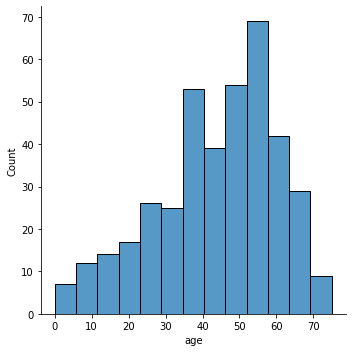

In [237]:
sns.displot(df.age)

In [243]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

## Model Building

In [242]:
## Logistic Regression

from sklearn.linear_model import LogisticRegression

In [244]:
model = LogisticRegression()

In [245]:
model.fit(x_train,y_train)

C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [246]:
pred_test= model.predict(x_test)
pred_test

array([40, 47, 47, 47, 47, 47, 57, 57, 52, 47, 47, 47, 47, 52, 26, 47, 26,
       57, 52, 57, 57, 47, 47, 52, 52, 26, 47, 47, 26, 26, 47, 47, 52, 57,
       47, 52, 47, 57, 52, 57, 47, 52, 47, 26, 57, 57, 52, 26, 47, 26, 47,
       47, 47, 57, 47, 57, 52, 52, 26, 40, 47, 57, 52, 40, 47, 26, 47, 57,
       47, 47, 47, 57, 26, 57, 40, 47, 47, 47, 47, 52, 57, 47, 57, 52, 47,
       47, 52, 40, 52, 47, 52, 26, 40, 47, 26, 52, 47, 57, 40],
      dtype=int64)

## Evaluating the Model

In [182]:
# accuracy score

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

In [247]:
accuracy_score(y_test,pred_test) # test accuracy

0.06060606060606061

In [248]:
# Confusion matrix

pd.crosstab(y_test,pred_test)

col_0,26,40,47,52,57
age,,,,,
1,1,0,0,0,0
6,1,0,0,0,0
8,1,0,0,0,0
13,1,0,0,0,0
21,1,0,0,0,0
22,1,0,0,0,0
23,2,0,0,0,0
24,1,0,0,0,0
25,1,0,0,0,0


In [249]:
# Classification report

print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.08      1.00      0.14         1
          27       0.00      0.00      0.00         2
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         2
          31       0.00      0.00      0.00         3
          32       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          36       0.00    

C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [186]:
# Precision 

#  TP/(TP+FP)

24/30


0.8

In [187]:
# Recall

# TP /(TP+FN)

24/32

0.75

In [188]:
# F1 score

# 2*precision*Recall / (precision+Recall)

2*0.8*0.75/(0.8+0.75)

0.7741935483870969

In [221]:
new_df.shape

(396, 26)

In [229]:
# performs the split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [223]:
# Display the shape 

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(297, 1)
(99, 1)
(297,)
(99,)


In [231]:
x_train.shape

(297, 1)

In [232]:
x_test.shape

(99, 1)

In [252]:
# ROC - AUC Score

probability = model.predict_proba(x_test)[:,1]
probability


array([2.04928876e-050, 6.29819675e-065, 6.89880867e-078, 6.89880867e-078,
       8.81583199e-070, 1.64113634e-079, 6.05683758e-104, 3.27465719e-107,
       3.72804385e-094, 6.29819675e-065, 6.89880867e-078, 1.52089380e-066,
       5.07070819e-073, 6.76268756e-091, 5.44496250e-044, 5.16942289e-086,
       3.16944491e-023, 1.76316335e-110, 8.73548746e-096, 1.40908614e-105,
       6.05683758e-104, 1.64113634e-079, 3.89743565e-081, 2.87428011e-089,
       6.76268756e-091, 2.18538945e-042, 6.89880867e-078, 2.89500681e-076,
       3.25429529e-004, 1.39283757e-037, 1.21270053e-074, 1.07342504e-061,
       1.58890338e-092, 1.76316335e-110, 6.89880867e-078, 3.72804385e-094,
       9.24048446e-083, 1.40908614e-105, 6.76268756e-091, 6.05683758e-104,
       2.18730746e-084, 3.72804385e-094, 3.89743565e-081, 4.08301240e-012,
       2.60061198e-102, 3.27465719e-107, 1.21985786e-087, 3.49529943e-039,
       2.18730746e-084, 1.35340924e-045, 3.89743565e-081, 7.43338162e-057,
       1.81407833e-058, 2

## RIDGE AND LASSO REGRESSION

In [256]:
# l1 Regularization technique- Lasso Regression
# l2 Regularization technique- Ridge Regression

In [259]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [260]:
r=Ridge()
l=Lasso()

In [261]:
r.fit(x_train,y_train)

Ridge()

In [262]:
l.fit(x_train,y_train)

Lasso()

In [265]:
pred1=r.predict(x_test)
pred1

array([30.00016116, 39.00004924, 46.99994975, 46.99994975, 42.00001193,
       47.99993732, 62.99975078, 64.99972591, 56.9998254 , 39.00004924,
       46.99994975, 40.00003681, 43.99998706, 54.99985027, 26.00021091,
       51.99988757, 13.00037257, 66.99970104, 57.99981296, 63.99973834,
       62.99975078, 47.99993732, 48.99992488, 53.9998627 , 54.99985027,
       25.00022334, 46.99994975, 45.99996219,  1.0005218 , 22.00026065,
       44.99997463, 37.00007411, 55.99983783, 66.99970104, 46.99994975,
       56.9998254 , 49.99991245, 63.99973834, 54.99985027, 62.99975078,
       50.99990001, 56.9998254 , 48.99992488,  6.00045962, 61.99976322,
       64.99972591, 52.99987514, 23.00024822, 50.99990001, 27.00019847,
       48.99992488, 34.00011142, 35.00009898, 61.99976322, 39.00004924,
       64.99972591, 53.9998627 , 56.9998254 , 24.00023578, 31.00014873,
       42.00001193, 74.99960155, 54.99985027, 30.00016116, 37.00007411,
       21.00027309, 50.99990001, 60.99977565, 39.00004924, 42.99

In [266]:
pred2=l.predict(x_test)
pred2

array([30.04786628, 39.01462477, 46.98507676, 46.98507676, 42.00354427,
       47.98138326, 62.92598075, 64.91859375, 56.94814176, 39.01462477,
       46.98507676, 40.01093127, 43.99615727, 54.95552876, 26.06264028,
       51.96660926, 13.11065579, 66.91120675, 57.94444825, 63.92228725,
       62.92598075, 47.98138326, 48.97768976, 53.95922226, 54.95552876,
       25.06633378, 46.98507676, 45.98877027,  1.1549778 , 22.07741429,
       44.99246377, 37.02201177, 55.95183526, 66.91120675, 46.98507676,
       56.94814176, 49.97399626, 63.92228725, 54.95552876, 62.92598075,
       50.97030276, 56.94814176, 48.97768976,  6.1365103 , 61.92967425,
       64.91859375, 52.96291576, 23.07372078, 50.97030276, 27.05894678,
       48.97768976, 34.03309228, 35.02939877, 61.92967425, 39.01462477,
       64.91859375, 53.95922226, 56.94814176, 24.07002728, 31.04417278,
       42.00354427, 74.88165874, 54.95552876, 30.04786628, 37.02201177,
       21.08110779, 50.97030276, 60.93336775, 39.01462477, 42.99

## 1.Evaluation metrics for Regression problem

In [267]:
# R-Square
# testing accuracy for both model

print(metrics.r2_score(y_test,pred1))
print(metrics.r2_score(y_test,pred2))

0.9999999998368482
0.9999856081783125


In [268]:
profit=pd.DataFrame({'Actual':y_test,'ridge_pred':pred1,'lasso_pred':pred2})
profit.head(10)

,Actual,ridge_pred,lasso_pred
82,30,30.000161,30.047866
280,39,39.000049,39.014625
169,47,46.999950,46.985077
153,47,46.999950,46.985077
232,42,42.000012,42.003544
91,48,47.999937,47.981383
286,63,62.999751,62.925981
299,65,64.999726,64.918594
199,57,56.999825,56.948142
115,39,39.000049,39.014625


In [269]:
## MSE(Mean square error)

print(metrics.mean_squared_error(y_test,pred1))
print(metrics.mean_squared_error(y_test,pred2))

3.7522833790478166e-08
0.0033099339693025715


## DECISION TREE CLASSIFIER

In [270]:
# X and y split

X=df.iloc[:,:-1]
X.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,3,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,139.0,3.8,15.4,44,7800,5.2,yes,yes,no,good,no,0,ckd
1,1,5,0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,410.0,18.0,0.8,136.0,4.9,11.3,38,6000,NaN,no,no,no,good,no,0,ckd
2,2,54,3,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,140.0,4.8,9.6,31,7500,NaN,no,yes,no,poor,no,1,ckd
3,3,40,2,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,1,ckd
4,4,43,3,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,136.0,4.0,11.6,35,7300,4.6,no,no,no,good,no,0,ckd


## 1. Model Building

In [277]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [278]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [279]:
y_predict= model.predict(x_test)
y_predict

array([26, 40, 47, 47, 42, 48, 62, 65, 57, 40, 47, 40, 42, 53, 26, 52, 17,
       65, 60, 62, 62, 48, 48, 53, 53, 23, 47, 47, 11, 23, 42, 38, 57, 65,
       47, 57, 48, 62, 53, 62, 52, 57, 48, 11, 62, 65, 53, 23, 52, 26, 48,
       33, 33, 62, 40, 65, 53, 57, 23, 26, 42, 65, 53, 26, 38, 17, 52, 60,
       40, 42, 42, 62, 11, 65, 26, 48, 40, 47, 52, 60, 65, 52, 65, 60, 33,
       48, 57, 26, 53, 47, 60, 23, 26, 52, 26, 53, 33, 65, 26],
      dtype=int64)

In [281]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.40      1.00      0.57         2
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.10      1.00      0.18         1
          27       0.00      0.00      0.00         2
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         2
          31       0.00      0.00      0.00         3
          32       0.00      0.00      0.00         1
          33       0.00    

C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\metrics\_cla

## RANDOM FOREST CLASSIFIER

## 1. Model Building

In [282]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [283]:
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [284]:
y_predict = model.predict(x_test)

In [285]:
y_predict_train = model.predict(x_train)

In [286]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [287]:
print('Training accuracy: ',accuracy_score(y_train,y_predict_train))
print('Testing accuracy: ',accuracy_score(y_test,y_predict))

Training accuracy:  0.98989898989899
Testing accuracy:  0.9797979797979798


## NAIVE BAYE'S CLASSIFIER

In [288]:
# using for classification problem.
# Naive baye's based on Baye's theorem fro the classification.

In [289]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [394]:
x_scaled = pd.DataFrame(scale.fit_transform(x),columns= x.columns)
x_scaled.head()

,age
0,0.533333
1,0.066667
2,0.720000
3,0.533333
4,0.573333


## 1. Model Building

In [294]:
# model building
from sklearn.naive_bayes import GaussianNB
model =GaussianNB()

In [295]:
model.fit(x_train,y_train)

GaussianNB()

In [296]:
# evaluating the model
y_pred = model.predict(x_test)


In [297]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [298]:
accuracy_score(y_test,y_pred)

0.9797979797979798

In [299]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1
          22       1.00      1.00      1.00         1
          23       1.00      1.00      1.00         2
          24       1.00      1.00      1.00         1
          25       1.00      1.00      1.00         1
          26       1.00      1.00      1.00         1
          27       1.00      1.00      1.00         2
          29       1.00      1.00      1.00         1
          30       1.00      1.00      1.00         2
          31       1.00      1.00      1.00         3
          32       1.00      1.00      1.00         1
          34       1.00      1.00      1.00         1
          35       1.00    

C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\metrics\_cla

## UNSUPERVISED K-MEANS 

In [300]:
from sklearn import cluster

In [332]:
error =[]
for i in range(11,1):
    kmeans=cluster.KMeans(n_clusters=i,init="k-means++",random_state=3)
    kmeans.fit(new_df)
    error.append(kmeans.inertia_)

In [333]:
error

[]

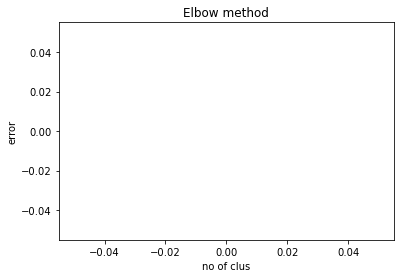

In [334]:
import matplotlib.pyplot as plt
plt.plot(range(11,1),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()

## KNN

## Model Building

In [340]:
# model building
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [341]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [395]:
y_pred=model.predict(x_test)

In [396]:
y_pred1=model.predict(x_train)

## Model Evaluation

In [345]:
# model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [385]:
# testing with a random observation

model.predict([[1.1]])

C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=int64)